In [2]:
#Let's start with importing necessary libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
#from sklearn.linear_model  import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
 #read the file
 data = pd.read_csv('/config/workspace/Dataset/diabetes.csv')
 data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#REPLACING 0 VALUES
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['Pregnancies'] = data['Pregnancies'].replace(0,data['Pregnancies'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,69.105469,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,19.355807,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,0.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,62.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

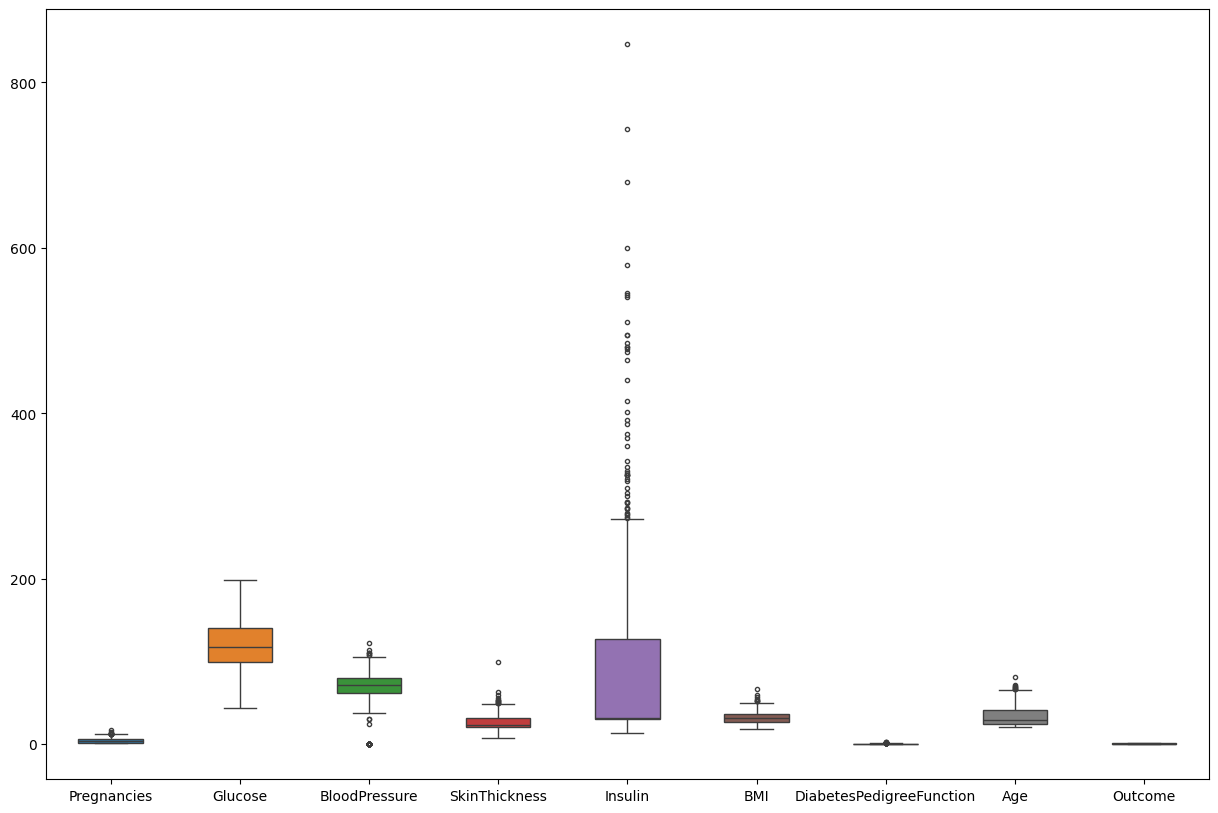

In [8]:
#FINDING OUTLIERS
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data = data, width=0.5, ax= ax, fliersize=3)

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72,35.000000,30.5,33.6,0.627,50,1
1,1.000000,85.0,66,29.000000,30.5,26.6,0.351,31,0
2,8.000000,183.0,64,20.536458,30.5,23.3,0.672,32,1
3,1.000000,89.0,66,23.000000,94.0,28.1,0.167,21,0
4,3.845052,137.0,40,35.000000,168.0,43.1,2.288,33,1


In [10]:
X = data.drop(columns= ['Outcome']) #DEPENDENT
Y = data['Outcome'] #INDIPENDENT

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size= 0.3,random_state=42)

In [12]:
X_train.shape , Y_train.shape

((537, 8), (537,))

In [13]:
import pickle
## Standard Scaling- Standardization
def scaler_standard(X_train,X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)

    #saving the Model
    file = open('/config/workspace/Model/modelForPrediction.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled,X_test_scaled

In [14]:
X_train_scaled, X_test_scaled = scaler_standard(X_train,X_test)

In [15]:
X_test_scaled

array([[ 0.41021381, -0.73944644, -0.44460031, ...,  0.17109532,
        -0.15228198,  0.7860505 ],
       [-0.85567872, -0.28934861,  0.32999837, ...,  0.42691307,
        -1.07730552, -1.05908052],
       [-0.85567872, -0.41794799, -0.17121254, ..., -0.31044397,
        -1.04450327, -1.05908052],
       ...,
       [-0.2717693 ,  0.19289907,  0.5578215 , ...,  0.51720169,
         1.0745223 , -0.89134133],
       [ 0.41021381, -0.51439752,  0.10217523, ..., -0.31044397,
        -1.16259138,  0.28283295],
       [ 0.09374068, -1.41459319,  0.64895076, ...,  0.44196118,
        -1.05106372,  0.11509377]])

In [16]:
X_train_scaled

array([[-1.13057121, -0.89585789, -0.53576428, ..., -1.20340503,
        -0.61421636, -0.94861028],
       [ 0.25220628, -0.56374882,  0.12804365, ...,  0.66490433,
        -0.90973787, -0.43466673],
       [-0.14705271,  0.43257839, -0.09322566, ...,  1.44097129,
        -0.30699103, -0.77729576],
       ...,
       [ 1.98067814, -0.69659245,  0.90248622, ...,  1.91523444,
         1.94892066,  0.42190587],
       [-0.14705271,  0.63184384, -3.8548039 , ...,  1.4553429 ,
        -0.77514391, -0.34900947],
       [-0.14705271,  0.10046932,  1.45565949, ..., -1.40460758,
        -0.60836445, -1.03426754]])

In [17]:
## Decision Tree Mode Training
import warnings
warnings.filterwarnings('ignore')

In [18]:
peremeter = {
    'criterion' : ['gini','entropy','log_loss'],
    'splitter' : ['best','random'],
    'max_depth': [1,2,3,4,5],
    'max_features' : ['auto','sqrt','log2']
}

In [19]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier()

In [20]:
clf = GridSearchCV(classifier,param_grid=peremeter,cv= 5,scoring='accuracy',verbose=3)
clf.fit(X_train,Y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [21]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [22]:
classifier = DecisionTreeClassifier(criterion='log_loss',max_depth = 5,max_features='log2',splitter='best'
)

In [23]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features='log2')

In [24]:
Y_pred = classifier.predict(X_test)

In [25]:
Y_pred = clf.predict(X_test_scaled)

In [26]:
conf_mat = confusion_matrix(Y_test,Y_pred)

In [27]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
true_negetive = conf_mat[1][0]
false_negetive = conf_mat[1][1]

In [28]:
accuracy = (true_positive + true_negetive) / (true_positive + false_positive + false_negetive + true_negetive)
accuracy

1.0

In [29]:
pricision = true_positive /(true_positive + false_positive)
pricision

1.0

In [30]:
recall = true_positive / (true_positive + false_negetive)
recall

1.0

In [31]:
import pickle
file = open('/config/workspace/Model/modelForPrediction.pkl', 'wb')
pickle.dump(classifier,file)
file.close()

In [32]:
## define parameter range
param_grid = { 'C' : [0.1,1,10,100,1000],
                'gamma' :[1,0.1,0.01,0.001,0.0001],
                'kernel' :['linear','rbf','polynomial']

}

In [33]:
grid =GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv = 5, verbose=3,scoring='accuracy')
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.843 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.759 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.794 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.748 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.757 total time=   0.3s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.645 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=1, kernel=polynomi

In [39]:
svc_clf = SVC(C = 0.1, gamma=1,kernel = 'linear')
svc_clf.fit(X_train,Y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [42]:
## Decision tree prediction
Y_pred_svc = svc_clf.predict(X_test_scaled)

In [45]:
conf_mat = confusion_matrix(Y_pred_svc,Y_test)
conf_mat

array([[151,  80],
       [  0,   0]])

In [47]:
accuracy = accuracy_score(Y_pred_svc,Y_test)
accuracy

0.6536796536796536